# Red Neuronal con Numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

## Creando set de datos

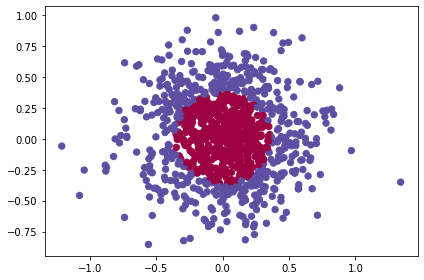

In [2]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None, cov=0.1, n_classes=2, n_features=2, n_samples=N, shuffle=True, random_state=None)

X, Y = gaussian_quantiles
Y = Y[:,np.newaxis]
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap='Spectral')
plt.tight_layout();

## Función de inicialización de parámetros

In [3]:
def initialize_parameters_deep(layer_dims):
    np.random.seed(1337)
    parameters = {}
    L = len(layer_dims)         
    for l in range(0, L-1):
        parameters['W' + str(l+1)] = (np.random.rand(layer_dims[l], layer_dims[l+1]) * 2) - 1
        parameters['b' + str(l+1)] = (np.random.rand(1, layer_dims[l+1]) * 2) - 1
    return parameters

## Función de activación

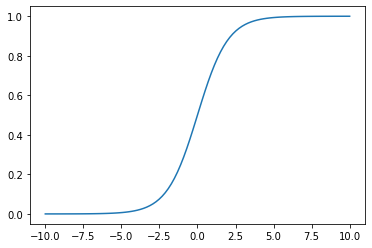

In [4]:
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:    
        return np.maximum(0,x)


x = np.linspace(10,-10,100)

plt.plot(x,sigmoid(x));

## Función de perdida

In [5]:
def mse(y,y_hat,derivate=False):
    if derivate:
        return (y_hat - y)
    else:            
        return np.mean((y_hat - y)**2)

## Función de entrenamiento

In [6]:
def train(X_data,lr,params,training=True):
## Forward

    params['A0'] = X_data
        
    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])
    
    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])
       
    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])
  
    output = params['A3']
    
    if training:
    # Backpropagation
    
        params['dZ3'] =  mse(Y,output,True) * sigmoid(params['A3'],True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])
        
        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])
        
        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])

        
        ## Gradient Descent:
           
        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr
        
        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr
        
        params['W1'] = params['W1'] -params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr
    
    return output

## Entrenando la red

In [8]:
layer_dims =[2, 4, 8, 1]
params = initialize_parameters_deep(layer_dims)
errors = []
for _ in range(50000):
    output = train(X,0.001,params)
    if _ % 25 == 0:
        print(mse(Y,output))
        errors.append(mse(Y,output))

0.028656593636862602
0.028608104487339817
0.028611503034585033
0.0285411028521907
0.02864428926350175
0.028608740266910522
0.028619220882248463
0.02855477349460795
0.02858818489032663
0.028609544573803873
0.028622975740853804
0.02853537887838544
0.028618916396719183
0.02857415006274948
0.02856496160239823
0.028583820845077518
0.028584949222478666
0.02849352573370278
0.028598725049483662
0.028528613346655768
0.028538565215188143
0.028553225016993672
0.028534976079500327
0.028561485846936276
0.028558767631875273
0.028469205455441373
0.02857103440443611
0.028482553563743084
0.028571318927095975
0.028506009648305665
0.028502961771191736
0.02850961459126161
0.028500242847919317
0.028514456302018095
0.028511605805852283
0.02850497328695464
0.028500349707105677
0.028497055693201347
0.028480070491739697
0.028490979267571548
0.02846981617275459
0.02847290201066225
0.02852414514549097
0.028436298697461906
0.028509862869913208
0.02838988846897352
0.028492258835598208
0.028475294950672178
0.028468

## Entrenando la red

0.028656593636862602
0.028608104487339817
0.028611503034585033
0.0285411028521907
0.02864428926350175
0.028608740266910522
0.028619220882248463
0.02855477349460795
0.02858818489032663
0.028609544573803873
0.028622975740853804
0.02853537887838544
0.028618916396719183
0.02857415006274948
0.02856496160239823
0.028583820845077518
0.028584949222478666
0.02849352573370278
0.028598725049483662
0.028528613346655768
0.028538565215188143
0.028553225016993672
0.028534976079500327
0.028561485846936276
0.028558767631875273
0.028469205455441373
0.02857103440443611
0.028482553563743084
0.028571318927095975
0.028506009648305665
0.028502961771191736
0.02850961459126161
0.028500242847919317
0.028514456302018095
0.028511605805852283
0.02850497328695464
0.028500349707105677
0.028497055693201347
0.028480070491739697
0.028490979267571548
0.02846981617275459
0.02847290201066225
0.02852414514549097
0.028436298697461906
0.028509862869913208
0.02838988846897352
0.028492258835598208
0.028475294950672178
0.028468

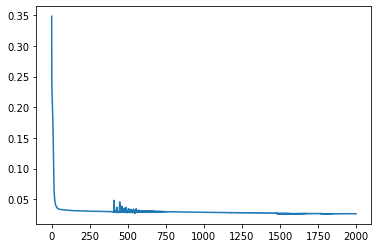

In [9]:
layer_dims =[2, 4, 8, 1]
params = initialize_parameters_deep(layer_dims)
errors = []
for _ in range(50000):
    output = train(X,0.001,params)
    if _ % 25 == 0:
        print(mse(Y,output))
        errors.append(mse(Y,output))

plt.plot(errors);

## Probando sobre datos nuevos

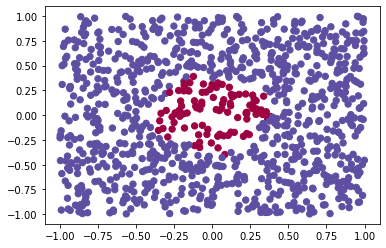

In [10]:
data_test = (np.random.rand(1000, 2) * 2) - 1
y = train(data_test,0.001,params,training=False)

y = np.where(y >= 0.5, 1, 0)

plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0] ,s=40, cmap=plt.cm.Spectral);

## Malla de visualización

<ipython-input-11-60bd8f4bec61>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(_x0,_x1,_y,cmap='coolwarm');


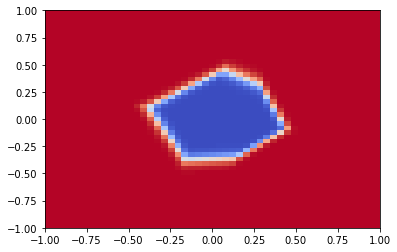

In [11]:
_x0 = np.linspace(-1,1,50)
_x1 = np.linspace(-1,1,50)

_y = np.zeros((50,50))

for i0, x0 in enumerate(_x0):
    for i1, x1 in enumerate(_x1):
        _y[i0,i1] = train(np.array([[x0,x1]]),0.0001,params,training=False)


plt.pcolormesh(_x0,_x1,_y,cmap='coolwarm');

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4ec84517-f553-446b-9032-1da3132bd62a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>